In [53]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2

Pearson's chi-squared test  is a statistical test applied to sets of categorical data to evaluate how likely it is that any observed difference between the sets arose by chance. 

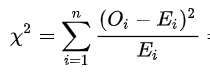

Example:
Determine if the given 2 medicine to people has any effect on the people based on given contingency table. Let alpha threshold be 0.1

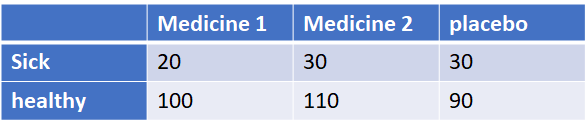

## calculate manually

In [61]:
def get_chisquare(table,alpha=0.05):
    table = np.array(table)
    col_sums = np.sum(table,axis=0)
    row_sums = np.sum(table,axis=1)
    row_sums_percent = row_sums/np.sum(row_sums)
    exp_table = np.zeros(shape=table.shape)
    
    dof = (table.shape[0]-1)*(table.shape[1]-1)
    
    for i in range(table.shape[0]):
        for j in range(table.shape[1]):
            exp_table[i][j] = row_sums_percent[i]*col_sums[j] 
    print("the expected table is: ")
    print("-----------------------------")
    exp_table_df = pd.DataFrame(exp_table)
    print(exp_table_df)
    print("-----------------------------")
    
    chi_val = 0
    for i in range(table.shape[0]):
        for j in range(table.shape[1]):
            chi_val += (table[i][j]-exp_table[i][j])**2/exp_table[i][j]
    
    print("the chi square value is ",chi_val)
    
    print("the critical chi square value is ",chi2.ppf(1-alpha,dof))
    
    print("the p value is ",1 - chi2.cdf(chi_val,dof))

In [62]:
get_chisquare(table,alpha=0.1)

the expected table is: 
-----------------------------
           0           1          2
0  25.263158   29.473684  25.263158
1  94.736842  110.526316  94.736842
-----------------------------
the chi square value is  2.5257936507936507
the critical chi square value is  4.605170185988092
the p value is  0.2828335193186947


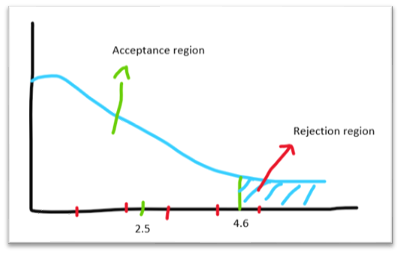

The calculated chi square value is 2.5 and the critical chi square value is 4.6. The chi square value is less than the critical value. Also the p value is greater than alpha value. Hence the null hypothesis cannot be rejected

## calculate using library

In [63]:
stat, p, dof, expected = chi2_contingency(table)

In [11]:
stat

2.5257936507936507

In [12]:
p

0.2828335193186947

In [13]:
dof

2

In [36]:
expected

array([[ 25.26315789,  29.47368421,  25.26315789],
       [ 94.73684211, 110.52631579,  94.73684211]])